In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [64]:
# Import and visualize the data
df = pd.read_csv('cryptocurrencies_top-100.csv')
df

,date,open,high,low,close,volume,market_cap,cryptocurrency
0,"Dec 02, 2020","18 801,74","19 308,33","18 347,72","19 201,09",37387697139,356381007571,bitcoin
1,"Dec 01, 2020","19 633,77","19 845,98","18 321,92","18 803,00",49633658712,348976597318,bitcoin
2,"Dec 02, 2020","587,26","604,02","578,74","598,35",16883292129,68015797685,ethereum
3,"Nov 30, 2020","18 178,32","19 749,26","18 178,32","19 625,84",47728480399,364229729426,bitcoin
4,"Dec 01, 2020","615,07","635,16","571,75","587,32",27178964465,66754367842,ethereum
...,...,...,...,...,...,...,...,...
104227,"Nov 28, 2017","65,67","65,70","50,29","54,47",22958800,0,bitcoin-diamond
104228,"Nov 27, 2017","66,30","70,60","63,82","65,89",22995100,0,bitcoin-diamond
104229,"Nov 26, 2017","94,20","94,25","65,90","66,12",20896400,0,bitcoin-diamond
104230,"Nov 25, 2017","69,35","104,84","68,77","94,22",45941900,0,bitcoin-diamond


In [65]:
# Count the total number of cryptocurrencies in the dataframe
df['cryptocurrency'].unique()
count=0
for i in df['cryptocurrency'].unique():
    count+=1
print(count)

100


In [66]:
# Data cleaning.
uncleaned_columns = list(df)[1:-2] 
for column in uncleaned_columns:
    df[column] = df[column].str.replace(',', '.')
    df[column] = df[column].str.replace('\xa0', '').astype(float)

In [67]:
# Check to see if everything looks correct in the  dataframe.
df.head(1000)

,date,open,high,low,close,volume,market_cap,cryptocurrency
0,"Dec 02, 2020",18801.74,19308.33,18347.72,19201.09,3.738770e+10,356381007571,bitcoin
1,"Dec 01, 2020",19633.77,19845.98,18321.92,18803.00,4.963366e+10,348976597318,bitcoin
2,"Dec 02, 2020",587.26,604.02,578.74,598.35,1.688329e+10,68015797685,ethereum
3,"Nov 30, 2020",18178.32,19749.26,18178.32,19625.84,4.772848e+10,364229729426,bitcoin
4,"Dec 01, 2020",615.07,635.16,571.75,587.32,2.717896e+10,66754367842,ethereum
...,...,...,...,...,...,...,...,...
995,"Jul 18, 2019",9698.50,10736.84,9376.80,10666.48,2.518702e+10,190129918121,bitcoin
996,"Jul 17, 2019",9471.21,9963.13,9163.13,9693.80,2.456992e+10,172777250515,bitcoin
997,"Jul 29, 2019",211.12,213.93,208.76,211.27,5.485191e+09,22627969069,ethereum
998,"Jul 28, 2019",207.41,212.04,202.25,211.19,5.504888e+09,22616386468,ethereum


In [54]:
# Select the biggest 10 cryptocurrencies based on their respective market cap
top_10 = df['cryptocurrency'].unique()[:10] 
print(top_10)

['bitcoin' 'ethereum' 'xrp' 'tether' 'litecoin' 'chainlink' 'bitcoin-cash'
 'cardano' 'polkadot-new' 'binance-coin']


In [60]:
close = []
volume = []
market_cap = []

for cryptocurrency in top_10:
    close.append(df.loc[df['cryptocurrency'] == cryptocurrency]["close"].tolist())
    volume.append(df.loc[df['cryptocurrency'] == cryptocurrency]["volume"].tolist())
    market_cap.append(df.loc[df['cryptocurrency'] == cryptocurrency]["market_cap"].tolist())


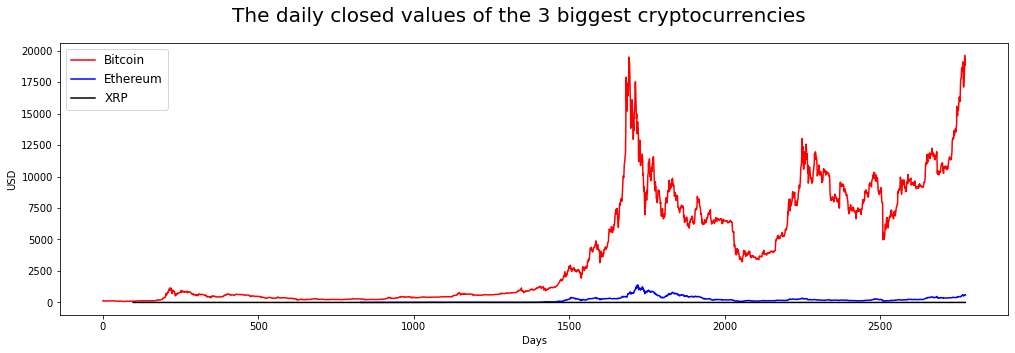

In [71]:
# Plot the daily closed values for the 3 biggest cryptocurrencies based on their market cap.
fig, ax = plt.subplots()
ax.plot(range(len(close[0])), close[0][::-1], label = 'Bitcoin', color = 'red') 
ax.plot(range(len(close[0])-len(close[1]), len(close[0])), close[1][::-1], label = 'Ethereum', color = 'blue')
ax.plot(range(len(close[0])-len(close[2]), len(close[0])), close[2][::-1], label = 'XRP', color = 'black') 

legend = ax.legend(loc='upper left', fontsize='large')
plt.xlabel('Days')
plt.ylabel('USD')
plt.rcParams["figure.figsize"] = (17,5)
fig.suptitle('The daily closed values of the 3 biggest cryptocurrencies', fontsize=20) 
plt.show()

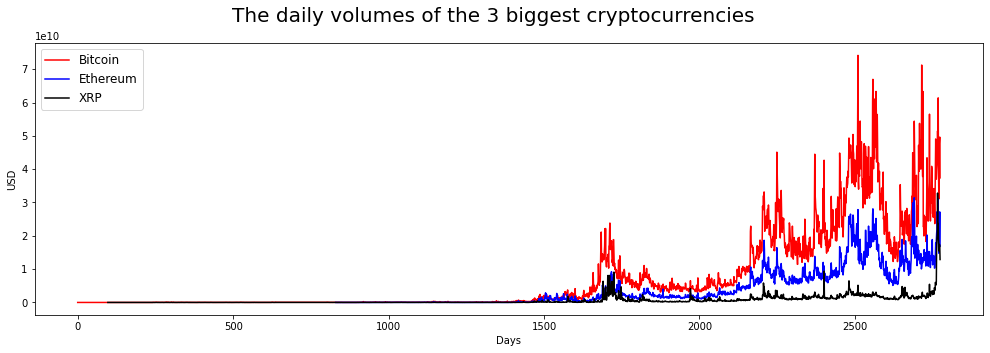

In [72]:
# Plot the daily volume for the 3 biggest cryptocurrencies based on their market cap.

fig, ax = plt.subplots()
ax.plot(range(len(volume[0])), volume[0][::-1], label = 'Bitcoin', color = 'red') 
ax.plot(range(len(volume[0])-len(volume[1]), len(volume[0])), volume[1][::-1], label = 'Ethereum', color = 'blue')
ax.plot(range(len(volume[0])-len(volume[2]), len(volume[0])), volume[2][::-1], label = 'XRP', color = 'black') 

legend = ax.legend(loc='upper left', fontsize='large')
plt.xlabel('Days')
plt.ylabel('USD')
#plt.title()
fig.suptitle('The daily volumes of the 3 biggest cryptocurrencies', fontsize=20) 
plt.rcParams["figure.figsize"] = (17,5)
plt.show()

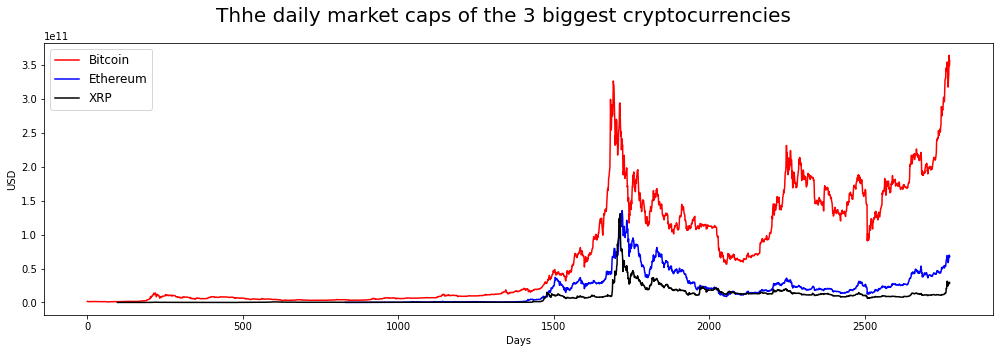

In [73]:
# Plot the daily market cap for the 3 biggest cryptocurrencies based on their market cap.

fig, ax = plt.subplots()
ax.plot(range(len(market_cap[0])), market_cap[0][::-1], label = 'Bitcoin', color = 'red') 
ax.plot(range(len(market_cap[0])-len(market_cap[1]), len(market_cap[0])), market_cap[1][::-1], label = 'Ethereum', color = 'blue')
ax.plot(range(len(market_cap[0])-len(market_cap[2]), len(market_cap[0])), market_cap[2][::-1], label = 'XRP', color = 'black')

legend = ax.legend(loc='upper left', fontsize='large')
plt.xlabel('Days')
plt.ylabel('USD')
#plt.title()
fig.suptitle('Thhe daily market caps of the 3 biggest cryptocurrencies', fontsize=20) 
plt.rcParams["figure.figsize"] = (17,5)
plt.show()